<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Introduction_to_Cartopy_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following:

```python
    lon = np.linspace(-80, 80, 25) 
    lat = np.linspace(30, 70, 25)   
    lon2d, lat2d = np.meshgrid(lon, lat)
    data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
```

to plot `data` on a Orthographic projection centered in Mexico.

### <font color='red'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [ ]:
!pip install owslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### This function is meant to replace an internal Python function ###

from owslib.wmts import TileMatrixSetLink, TileMatrixLimits
from owslib.wmts import _TILE_MATRIX_SET_TAG, _TILE_MATRIX_SET_LIMITS_TAG
from owslib.wmts import _TILE_MATRIX_LIMITS_TAG

def custom_from_elements(link_elements):
    links = []
    for link_element in link_elements:
        matrix_set_elements = link_element.findall(_TILE_MATRIX_SET_TAG)
        if len(matrix_set_elements) == 0:
            raise ValueError('Missing TileMatrixSet in %s' % link_element)
        elif len(matrix_set_elements) > 1:
            set_limits_elements = link_element.findall(
                _TILE_MATRIX_SET_LIMITS_TAG)
            if set_limits_elements:
                raise ValueError('Multiple instances of TileMatrixSet'
                                  ' plus TileMatrixSetLimits in %s' %
                                  link_element)
            for matrix_set_element in matrix_set_elements:
                uri = matrix_set_element.text.strip()
                links.append(TileMatrixSetLink(uri))
        else:
            uri = matrix_set_elements[0].text.strip()

            tilematrixlimits = {}
            path = '%s/%s' % (_TILE_MATRIX_SET_LIMITS_TAG,
                              _TILE_MATRIX_LIMITS_TAG)
            for limits_element in link_element.findall(path):
                tml = TileMatrixLimits(limits_element)
                if tml.tilematrix:
                    tilematrixlimits[tml.tilematrix] = tml

            links.append(TileMatrixSetLink(uri, tilematrixlimits))
    return links

TileMatrixSetLink.from_elements = custom_from_elements

<font color="blue">Remote Image</font>

Example 1:

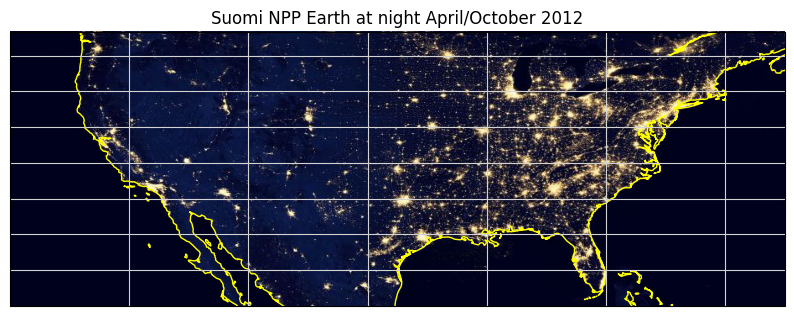

In [ ]:
# Define resource for the NASA night-time illumination data.

base_uri = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer_name = 'VIIRS_CityLights_2012'

#eng_boundingbox = [-6, 3, 48, 58]
usa_boundingbox = [-130, -65, 24, 47]

# Create a Cartopy crs for plain and rotated lat-lon projections.
plain_crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 7))

# Plot WMTS data in a specific region, over a plain lat-lon map.
ax = fig.add_subplot(1, 1, 1, projection=plain_crs)
ax.set_extent(usa_boundingbox, crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='yellow')
ax.gridlines(color='lightgrey', linestyle='-')
# Add WMTS imaging.
ax.add_wmts(base_uri, layer_name=layer_name)

ax.set_title('Suomi NPP Earth at night April/October 2012')

plt.show()

Example 2:

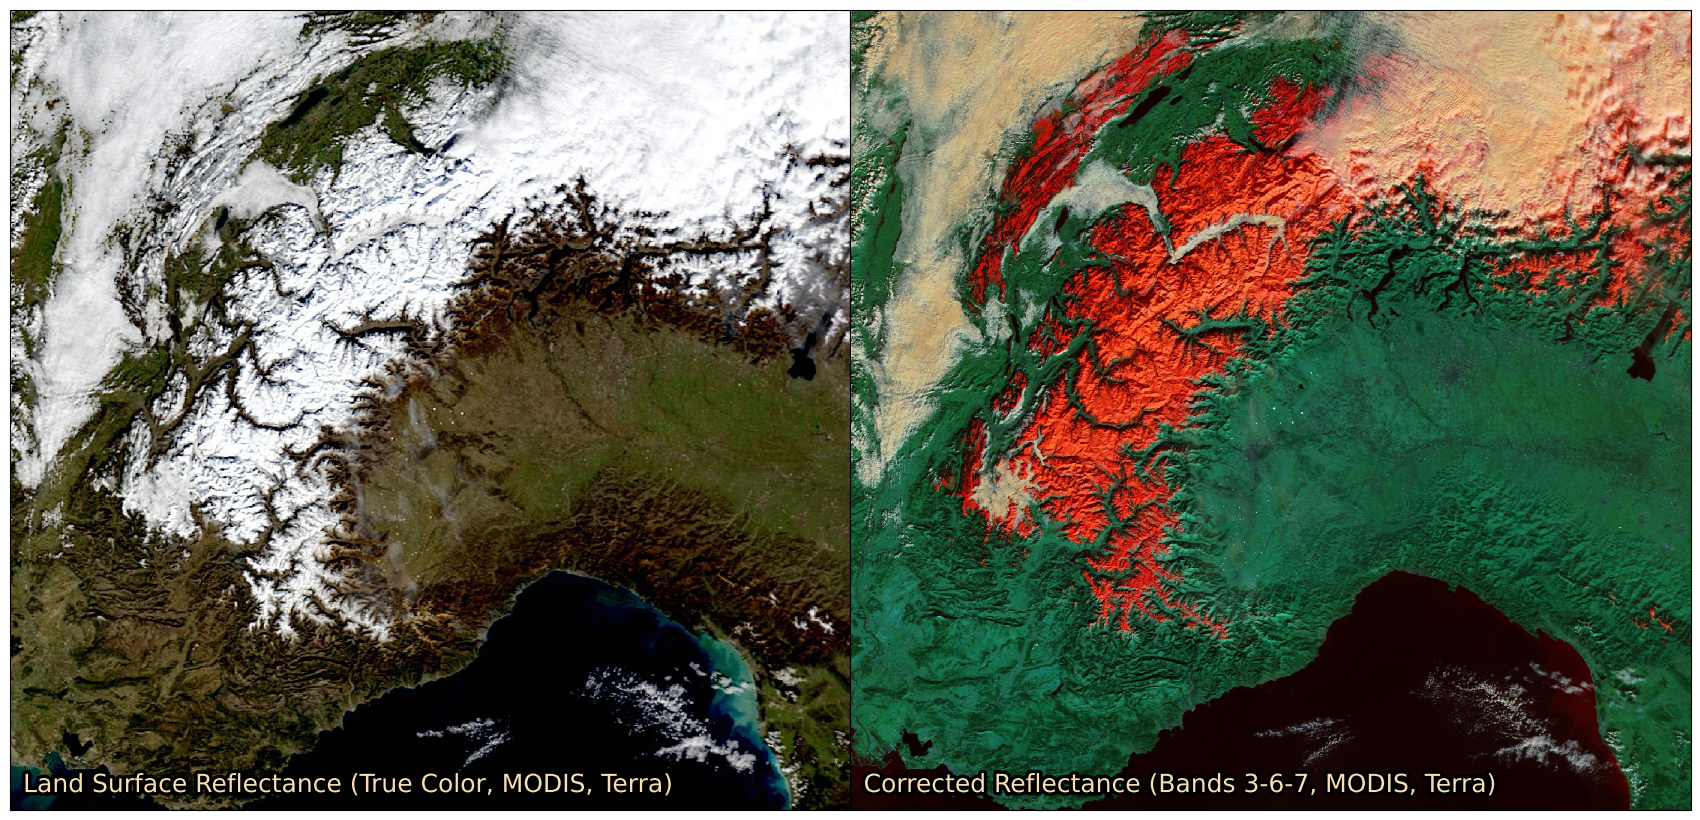

In [ ]:
import matplotlib.patheffects as PathEffects
from owslib.wmts import WebMapTileService

# URL of NASA GIBS
URL = 'https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts = WebMapTileService(URL)

# Layers for MODIS true color and snow RGB
layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
          'MODIS_Terra_CorrectedReflectance_Bands367']

date_str = '2016-02-05'

# Plot setup
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()
x0, y0 = plot_CRS.transform_point(4.6, 43.1, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(11.0, 47.4, geodetic_CRS)
ysize = 8
xsize = 2 * ysize * (x1 - x0) / (y1 - y0)
fig = plt.figure(figsize=(xsize, ysize), dpi=100)

for layer, offset in zip(layers, [0, 0.5]):
    ax = fig.add_axes([offset, 0, 0.5, 1], projection=plot_CRS)
    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    ax.add_wmts(wmts, layer, wmts_kwargs={'time': date_str})
    txt = ax.text(4.7, 43.2, wmts[layer].title, fontsize=18, 
                  color='wheat', transform=geodetic_CRS)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5,
                                                 foreground='black')])
plt.show()


<font color="blue">Satellite Image</font>

In [ ]:
# Get the remote file
from urllib.request import urlopen
from PIL import Image
url = "https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg"

img = Image.open(urlopen(url))

print("Type of object: ", type(img))
print("Image size:     ", img.size)

HTTPError: ignored

**Information on the file:** <a href="https://lance.modaps.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.txt">Tropical Storm Miriam (13E) off Mexico</a>
 
| Key  | Value |
| --- | --- |
| region | Pa | 
| sat | Aqua | 
| projection |Plate Carree | 
| projection center lon |-113.5000 | 
| projection center lat | +22.0000 | 
| image center lon | -113.5 | 
| image center lat | +22 | 
| standard parallel | +20.0000 | 
| UL lon |-120.6766 | 
| UL lat |+30.7669 | 
| UR lon | -106.3210 | 
| UR lat | +30.7669 | 
| LR lon | -106.3210 | 
| LR lat | +13.2301 | 
| LL lon | -120.6766 | 
| LL lat | +13.2301 | 
| UL easting (km) | -749.8750 | 
| UL northing (km) | +3421.1250 | 
| x scale factor | +0.9396926207859084 | 
| ellipsoid | WGS84 | 
| Contact | Jeff Schmaltz | 
| L2 granules | A122702045 A122702050 | 

NameError: ignored

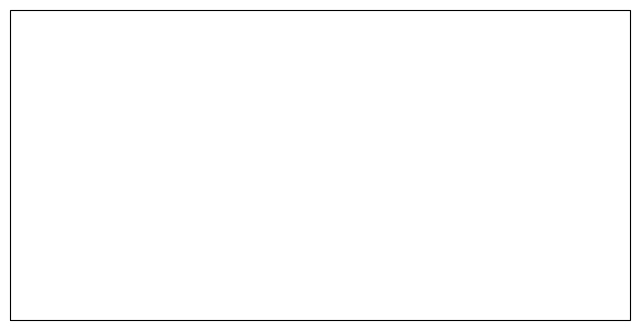

In [ ]:
fig = plt.figure(figsize=(8, 12))

img_extent = (-120.67660000000001, -106.32104523100001, \
              13.2301484511245, 30.766899999999502)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of 
# the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, \
          transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Exercise 3
We want to use the netCDF file:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc

to plot the surface air temperature (variable `tas`).

* The code below obtains the netCDF file and extracts the variable `tas`.
* You need to use cartopy to do a contour plot and add the colorbar.

The metadata of the file is located at:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.cdl

### <font color='red'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [ ]:
!pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls

sample_data  sresa1b_ncar_ccsm3-example.nc


In [ ]:
# Get the remote  file
import urllib.request
import os

url = "https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc"

nc_file = os.path.basename(url)
urllib.request.urlretrieve(url, nc_file)

('sresa1b_ncar_ccsm3-example.nc', <http.client.HTTPMessage at 0x7f858804ab00>)

**`ncdump -h` the netCDF file**

In [ ]:
import netCDF4 as nc4
import numpy as np

def my_ncdump(file_name):
    with nc4.Dataset(file_name, mode='r') as ncfid:
         for name, var in ncfid.variables.items():
             print("{}:".format(name))
             print("{:>20}: {}".format("Dimension", var.dimensions))
             print("{:>20}: {}".format("Dimension value", var.shape))
             print("{:>20}: {}".format("Type", var.dtype))
             for attr in var.ncattrs():
                 print("{:>20}: {}".format(attr, var.getncattr(attr)))
         print()
         print("Global attributes")
         for attr in ncfid.ncattrs():
             print("{:>20}: {}".format(attr, ncfid.getncattr(attr)))
                
my_ncdump(nc_file)

area:
           Dimension: ('lat', 'lon')
     Dimension value: (128, 256)
                Type: float32
           long_name: Surface area
               units: meter2
lat:
           Dimension: ('lat',)
     Dimension value: (128,)
                Type: float32
           long_name: latitude
               units: degrees_north
                axis: Y
       standard_name: latitude
              bounds: lat_bnds
lat_bnds:
           Dimension: ('lat', 'bnds')
     Dimension value: (128, 2)
                Type: float64
lon:
           Dimension: ('lon',)
     Dimension value: (256,)
                Type: float32
           long_name: longitude
               units: degrees_east
                axis: X
       standard_name: longitude
              bounds: lon_bnds
lon_bnds:
           Dimension: ('lon', 'bnds')
     Dimension value: (256, 2)
                Type: float64
msk_rgn:
           Dimension: ('lat', 'lon')
     Dimension value: (128, 256)
                Type: int32
        

**Read the netCDF file**

In [ ]:
# Open the netCDF file and read surface air temperature
from netCDF4 import Dataset
import numpy as np
with Dataset(nc_file,'r') as ncid:
     lons = ncid.variables['lon'][:] # longitude grid points
     lats = ncid.variables['lat'][:] # latitude grid points
     surf_temp = ncid.variables['tas'][0] 

print("Shape of lons:      ", np.shape(lons), lons[0], lons[-1])
print("Shape of lats:      ", np.shape(lats), lats[0], lats[-1])
print("Shape of surf_temp: ", np.shape(surf_temp))

Shape of lons:       (256,) 0.0 358.59375
Shape of lats:       (128,) -88.927734 88.927734
Shape of surf_temp:  (128, 256)


**Use `Cartopy` to do a contour plot**

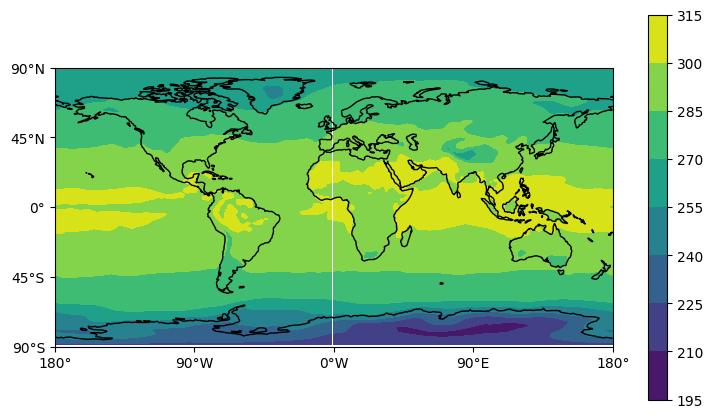

In [ ]:
plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

im = ax.contourf(lons, lats, surf_temp, transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5),   crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, orientation='vertical')

ax.set_global()
plt.show()

**Remove the equatorial line**

- Make sure that we cycle the longitude

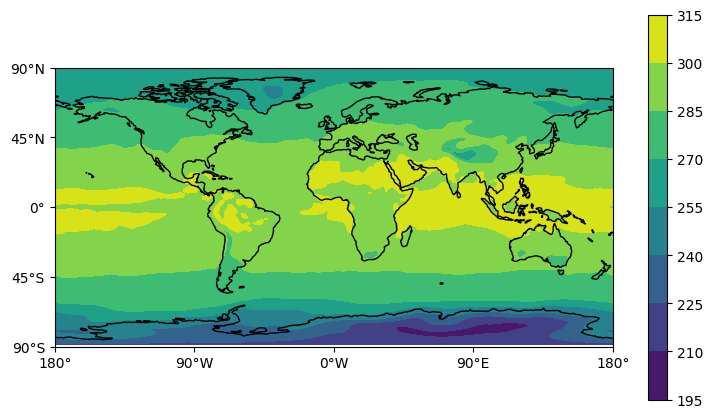

In [ ]:
import cartopy.util

plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

surf_temp, lons = cartopy.util.add_cyclic_point(surf_temp, 
                                                coord=lons)

im = ax.contourf(lons, lats, surf_temp, transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5),   crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, orientation='vertical')

ax.set_global()
plt.show()

# <font color="red"> Cartopy and Shapefile Files</font>

## What is Shapefile?

The shapefile format:
* Is a digital vector storage format for storing geometric location and associated attribute information.
* Geographic features in a shapefile can be represented by points, lines, or polygons (areas).
* Is non-topological. It does not maintain spatial relationship information such as connectivity, adjacency, and area definition.
* Because the structure of points, lines, and polygons are different, each individual shapefile can only contain one vector type (all points, all lines or all polygons). You will not find a mixture of point, line and polygon objects in a single shapefile.
* Was introduced with ArcView GIS version 2 in the early 1990s.

#### Representation of the geographic features of a shapefile

![features](https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png)
Image Source: Colin Williams (NEON)


## Content of Shapefile Files

Every shapefile data set includes at least three files:

* **.shp**: The main file that contains the primary geographic reference data and records of various shape types included, such as points, polygons, or multipatches.
* **.dbf**: The dBase file that stores attributes for each shape. It alows quicker access to the spatial features of the data.
* **.shx**: Organize the records of a shapefile for reference.

These files need to have the same name and to be stored in the same directory (folder).

Sometimes, a shapefile will have other associated files including:

* **.prj**: Contains information on projection format including the coordinate system and projection information. It is a plain text file describing the projection using well-known text (WKT) format.
* **.sbn** and **.sbx**: the files that are a spatial index of the features.
* **.shp.xml**: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).

#### Spatial Data Attributes

- Each object in a shapefile has one or more attributes associated with it. 
- Shapefile attributes are similar to fields or columns in a spreadsheet. 
- Each row in the spreadsheet has a set of columns associated with it that describe the row element.
- Attribute data are stored in the **.dbf** file. 

![attributes](https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/spatial-attribute-tables.png)
Image Source: National Ecological Observatory Network (NEON)

<font color="blue"> EXAMPLE: Color all the "counties" in Belgium</font>

In [ ]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://raw.githubusercontent.com/astg606/py_materials/master/visualization/borders/'

file_list = ["BEL_adm3.csv", "BEL_adm3.dbf", "BEL_adm3.prj", "BEL_adm3.shp", "BEL_adm3.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

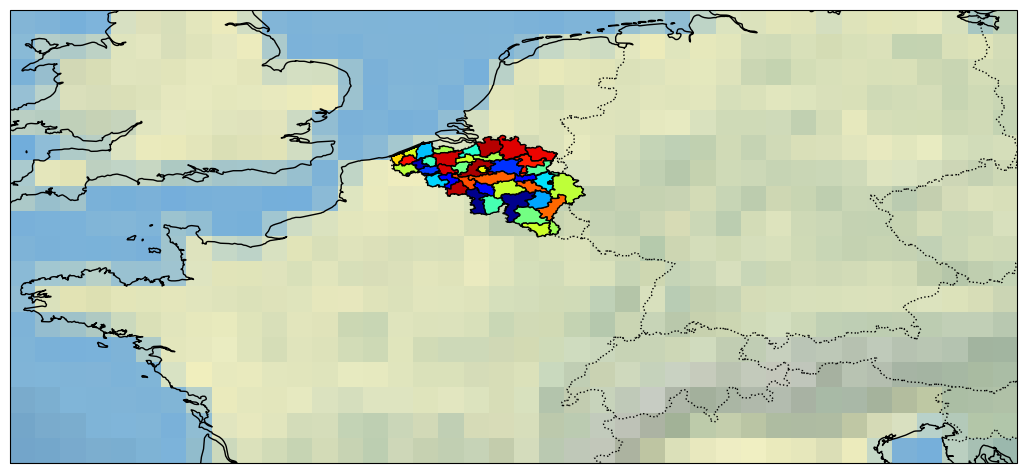

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(13, 11),
                       subplot_kw=subplot_kw)

# Create a map of Europe
#---------------------------
lower_lon = -5.0
upper_lon = 15.
lower_lat = 45.
upper_lat = 54.

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Put a background image on for nice sea rendering.
ax.stock_img()

ax.add_feature(cfeature.BORDERS, linestyle=':')
#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

# Get the shapes  (from the shp file) and 
#         records (from the dbf files)
# ---------------------------------------
reader = shapereader.Reader('BEL_adm3')

# The read shapefile method allows you to call the shapefile's shapes and info. 
# Both are lists, the first containing a list of tuples (coordinates), 
# and the second containig a dictionary with associated metadata

# Plots the shapes as Polygons with a random facecolor
for country in reader.geometries():
    ax.add_geometries([country], ccrs.PlateCarree(), \
                      facecolor=cm.jet(np.random.rand()), \
                      edgecolor='black')
    
plt.show()

## Cartopy and the Natural Earth Dataset

* Cartopy provides an interface for access to frequently used data such as the <a href="https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html">GSHHS</a> dataset and from the <a href="http://www.naturalearthdata.com">NaturalEarthData</a> website. 
* These interfaces allow the user to define the data programmatically, and if the data does not exist on disk, it will be retrieved from the appropriate source (normally by downloading the data from the internet).

**You can use the Natural Earth Data database to have higher-resolution features:**

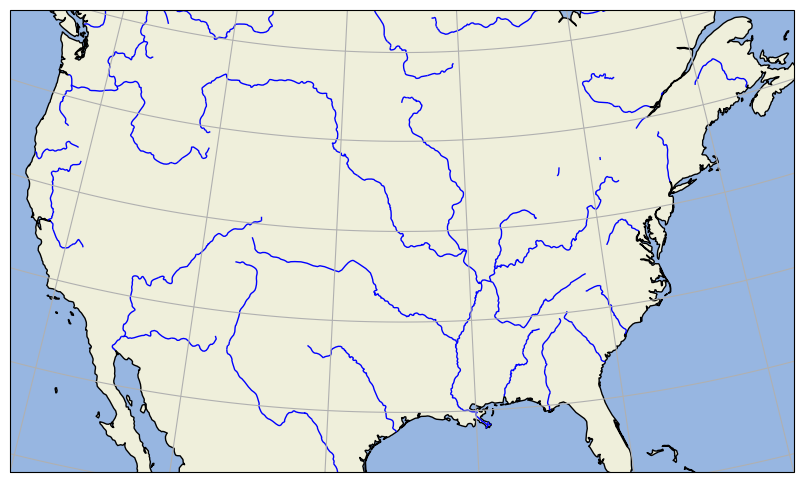

In [ ]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cartopy.feature.RIVERS, edgecolor='b')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

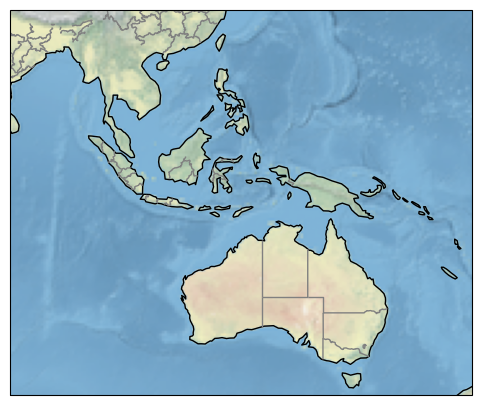

In [ ]:
fig = plt.figure(figsize=(12, 5))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

plt.show()

**To acquire the countries dataset from Natural Earth, we may use:**

In [ ]:
import cartopy.io.shapereader as shapereader
 
shpfilename = shapereader.natural_earth(resolution='110m', \
                                      category='cultural', \
                                      name='admin_0_countries')

The function `Reader` provides an interface for accessing the contents of a shapefile. It returns an instance that has two primary methods:

* **geometries()**: Returns an iterator of shapely geometries from the shapefile.
* **records()**: Returns an iterator of Record (entry of the file that combines attributes with their associated geometry) instances.

In [ ]:
reader = shapereader.Reader(shpfilename)
countries = reader.records()
country = next(countries)

In [ ]:
print(type(country.attributes))

<class 'dict'>


In [ ]:
for key in country.attributes:
    print("{:} --> {:>}".format(key, country.attributes[key]))

featurecla --> Admin-0 country
scalerank --> 1
LABELRANK --> 6
SOVEREIGNT --> Fiji
SOV_A3 --> FJI
ADM0_DIF --> 0
LEVEL --> 2
TYPE --> Sovereign country
TLC --> 1
ADMIN --> Fiji
ADM0_A3 --> FJI
GEOU_DIF --> 0
GEOUNIT --> Fiji
GU_A3 --> FJI
SU_DIF --> 0
SUBUNIT --> Fiji
SU_A3 --> FJI
BRK_DIFF --> 0
NAME --> Fiji
NAME_LONG --> Fiji
BRK_A3 --> FJI
BRK_NAME --> Fiji
BRK_GROUP --> 
ABBREV --> Fiji
POSTAL --> FJ
FORMAL_EN --> Republic of Fiji
FORMAL_FR --> 
NAME_CIAWF --> Fiji
NOTE_ADM0 --> 
NOTE_BRK --> 
NAME_SORT --> Fiji
NAME_ALT --> 
MAPCOLOR7 --> 5
MAPCOLOR8 --> 1
MAPCOLOR9 --> 2
MAPCOLOR13 --> 2
POP_EST --> 889953.0
POP_RANK --> 11
POP_YEAR --> 2019
GDP_MD --> 5496
GDP_YEAR --> 2019
ECONOMY --> 6. Developing region
INCOME_GRP --> 4. Lower middle income
FIPS_10 --> FJ
ISO_A2 --> FJ
ISO_A2_EH --> FJ
ISO_A3 --> FJI
ISO_A3_EH --> FJI
ISO_N3 --> 242
ISO_N3_EH --> 242
UN_A3 --> 242
WB_A2 --> FJ
WB_A3 --> FJI
WOE_ID --> 23424813
WOE_ID_EH --> 23424813
WOE_NOTE --> Exact WOE match as country
AD

<font color="blue"> EXAMPLE: Map the Globe and Color the United States</font>

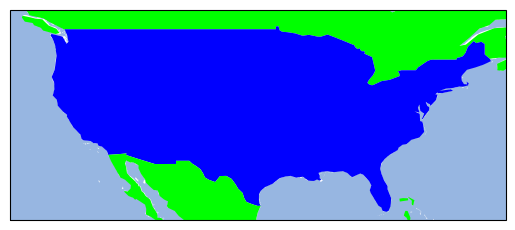

In [ ]:
# Select the map projection
#----------------------
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([-130, -65, 24, 47])
 
for country in countries:
    if country.attributes['ADM0_A3'] == 'USA':
        ax.add_geometries(country.geometry, \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1),
                          label=country.attributes['ADM0_A3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 1, 0), \
                          label=country.attributes['ADM0_A3'])
 
plt.show()

### Exercise:
Draw the USA map and randomly color each state.

You may want to use:

```python
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shapereader.natural_earth(resolution='110m',
                                       category='cultural',
                                       name=shapename)

reader = shapereader.Reader(states_shp)
```

### <font color="blue"> EXAMPLE: Select the country Cameroon and color each of its administrative region with a different color </font>

error: ignored

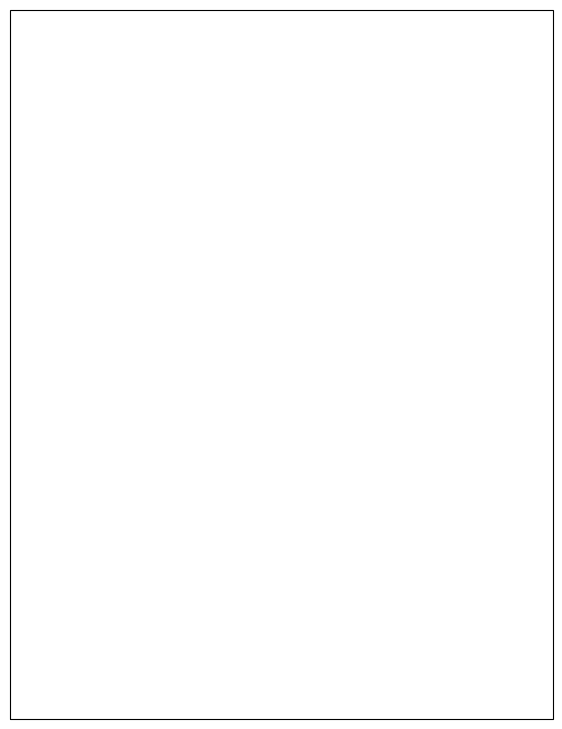

In [ ]:
from matplotlib.colors import cnames
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Read the Natural Earth shapefile dataset
#----------------------------------
kw = dict(resolution='10m', category='cultural', \
          name='admin_1_states_provinces')
states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)
 
# Select the map projection
#----------------------
subplot_kw = dict(projection=ccrs.PlateCarree())
 
fig, ax = plt.subplots(figsize=(7, 11), subplot_kw=subplot_kw)
 
# Select the area that includes Cameroon
#----------------------------------
ax.set_extent([7.85, 17.05, 1.475, 13.50])
#ax.set_extent([7.5, 17.5, 1.25, 15])

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)
 
# Get from Matplotlib a list of colors
#------------------------------
colors = list(cnames.keys())
len_colors = len(colors)
 
k = 0
for record, state in zip(shp.records(), shp.geometries()):
    if record.attributes['admin'] == 'Cameroon':
        if k+1 == len_colors:
            k = 0
        else:
            k += 1
        facecolor = colors[k]
        ax.add_geometries([state], ccrs.PlateCarree(), \
                      facecolor=facecolor, edgecolor='black')
    else:
        facecolor = 'LightGray'
#    ax.add_geometries([state], ccrs.PlateCarree(), \
#                      facecolor=facecolor, edgecolor='black')
 
plt.show()